<a href="https://colab.research.google.com/github/luvbenz/2025-CV/blob/hw2/2-7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Fig0939(a)(headCT-Vandy).tif to Fig0939(a)(headCT-Vandy) (4).tif


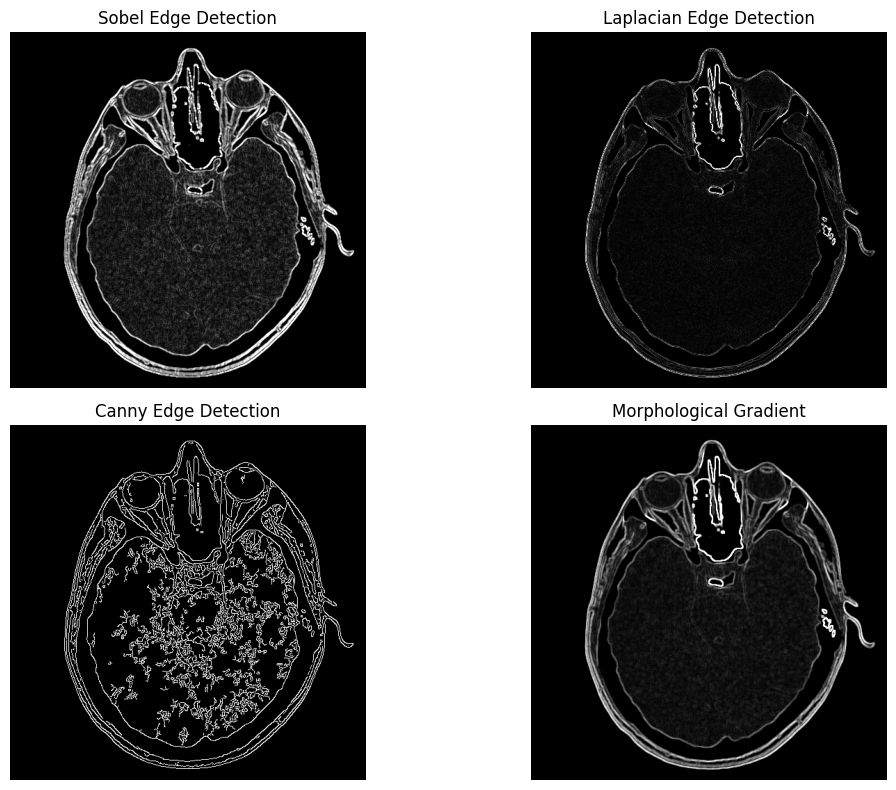

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 파일 업로드 호출
uploaded = files.upload()

# 이미지 불러오기
img = cv.imread('Fig0939(a)(headCT-Vandy).tif', cv.IMREAD_UNCHANGED)
gray = img

# 1. Sobel edge 검출 (방향성 있음)
# x축, y축 방향의 에지 검출 후 가중 평균
grad_x = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3)
grad_y = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3)
sobel_edge = cv.addWeighted(cv.convertScaleAbs(grad_x), 0.5,
                            cv.convertScaleAbs(grad_y), 0.5, 0)

# 2. Laplacian edge 검출 (더 날카로운 변화 감지)
laplacian_edge = cv.convertScaleAbs(cv.Laplacian(gray, cv.CV_64F))

# 3. Canny edge 검출 (비최대 억제 + 이중 임계값)
# 가장 정확하고 날카로운 에지 검출 결과 제공
canny_edge = cv.Canny(gray, 50, 150)

# 4. Morphological Gradient (팽창 - 침식)
# 밝기 경계(형태학적 외곽선)를 추출
se = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
morph_grad = cv.morphologyEx(gray, cv.MORPH_GRADIENT, se)

# 결과
titles = ['Sobel Edge Detection',
          'Laplacian Edge Detection',
          'Canny Edge Detection',
          'Morphological Gradient']

images = [sobel_edge, laplacian_edge, canny_edge, morph_grad]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])  # 어떤 방식인지 표시
    plt.axis('off')
plt.tight_layout()
plt.show()
